In [ ]:
# Подключаем библиотеки
import pandas as pd # Работа с набором данных
import numpy as np # Линейная алгебра
# Визуализация данных
import seaborn as sns
import matplotlib.pyplot as plt

# отключение информационных сообщений
from warnings import filterwarnings
filterwarnings(action='ignore')

In [ ]:
url='ДФ оценки.xlsx'
data = pd.read_excel(url)
data.head ()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [ ]:
data.dtypes

,0
STG,float64
SCG,float64
STR,float64
LPR,float64
PEG,float64
UNS,object


In [ ]:
data.describe()

,STG,SCG,STR,LPR,PEG
count,258.000000,258.000000,258.000000,258.000000,258.000000
mean,0.371147,0.355674,0.468004,0.432713,0.458539
std,0.210271,0.211962,0.245940,0.248108,0.255211
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240750,0.210000,0.291250,0.250000,0.250000
50%,0.327000,0.302500,0.490000,0.330000,0.500000
75%,0.495000,0.497500,0.690000,0.647500,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.930000


In [ ]:
data.groupby(' UNS').describe()

STG                                                            SCG  \
         count      mean       std   min      25%     50%     75%   max count   
 UNS                                                                            
High      63.0  0.421651  0.239661  0.00  0.26900  0.4000  0.4950  0.99  63.0   
Low       83.0  0.321145  0.173991  0.02  0.20000  0.2950  0.3950  0.73  83.0   
Middle    88.0  0.399977  0.213585  0.06  0.25350  0.3775  0.5700  0.80  88.0   
very_low  24.0  0.305792  0.187292  0.00  0.22125  0.2775  0.3825  0.68  24.0   

                    ...     LPR         PEG                                   \
              mean  ...     75%   max count      mean       std   min    25%   
 UNS                ...                                                        
High      0.423190  ...  0.7750  0.99  63.0  0.772540  0.107568  0.47  0.710   
Low       0.337000  ...  0.7100  0.98  83.0  0.237627  0.072992  0.01  0.190   
Middle    0.367920  ...  0.4225  0.88  88.0  0.542386  0.126218  0.25  0.500   
very_low  0.198125  ...  0.5050  0.66  24.0  0.090833  0.056331  0.00  0.065   

                              
           50%     75%   max  
 UNS                          
High      0.79  0.8500  0.93  
Low       0.25  0.2900  0.35  
Middle    0.57  0.6400  0.83  
very_low  0.10  0.1025  0.24  

[4 rows x 40 columns]

In [ ]:
data.groupby(' UNS').size()

,0
UNS,
High,63
Low,83
Middle,88
very_low,24


<Axes: xlabel='STG', ylabel='LPR'>

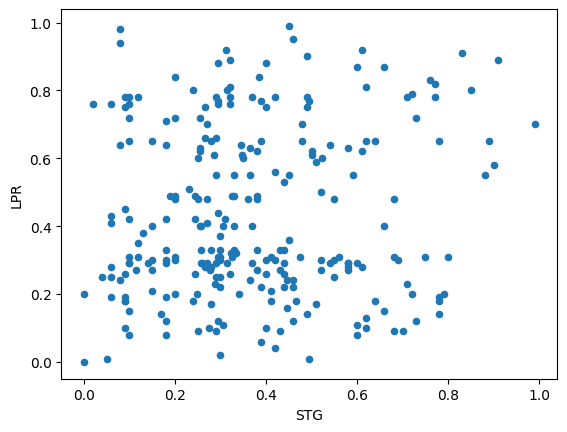

In [ ]:
data.plot(kind='scatter',x='STG', y='LPR')

<Axes: xlabel='SCG', ylabel='PEG'>

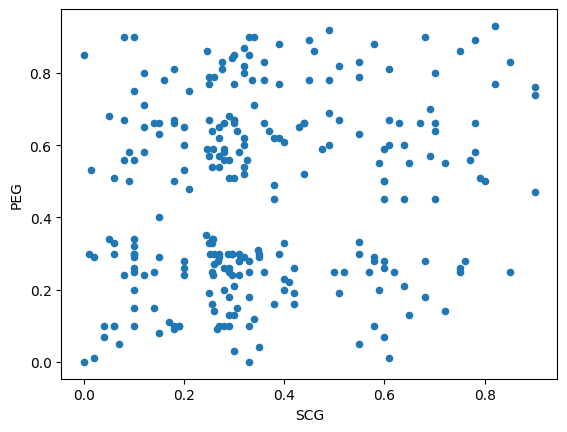

In [ ]:
data.plot(kind='scatter',x='SCG', y='PEG')

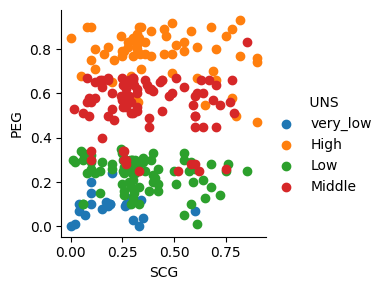

In [ ]:
sns.FacetGrid(data, hue = ' UNS') \
    .map(plt.scatter, 'SCG','PEG') \
    .add_legend()

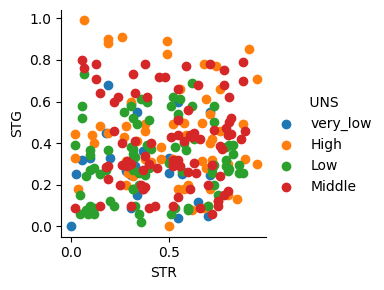

In [ ]:
sns.FacetGrid(data, hue = ' UNS') \
    .map(plt.scatter, 'STR','STG') \
    .add_legend()



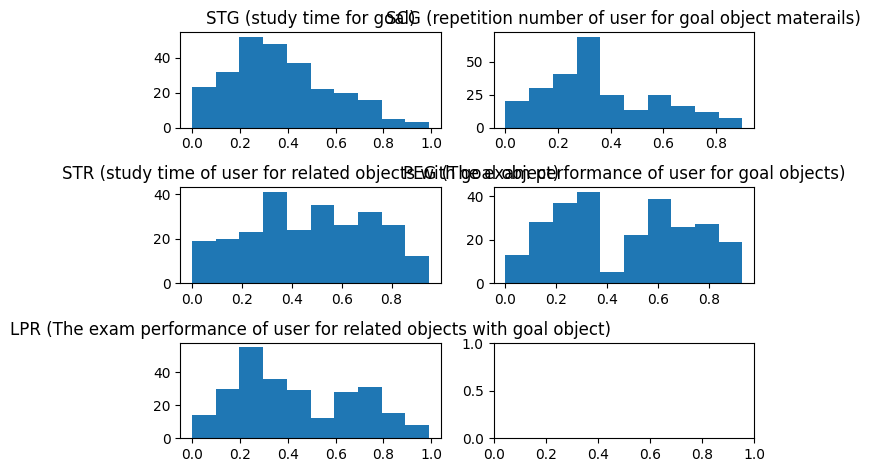

In [ ]:
# Гистограммы по каждому параметру
n_bins = 10
fig, axs = plt.subplots(3, 2)
axs[0,0].hist(data['STG'], bins = n_bins);
axs[0,0].set_title('STG (study time for goal)');
axs[0,1].hist(data['SCG'], bins = n_bins);
axs[0,1].set_title('SCG (repetition number of user for goal object materails)');
axs[1,0].hist(data['STR'], bins = n_bins);
axs[1,0].set_title('STR (study time of user for related objects with goal object)');
axs[1,1].hist(data['PEG'], bins = n_bins);
axs[1,1].set_title('PEG (The exam performance of user for goal objects)');

axs[2,0].hist(data['LPR'], bins = n_bins);
axs[2,0].set_title('LPR (The exam performance of user for related objects with goal object)');


# добавим отступы между диаграммами
fig.tight_layout(pad=1.0);

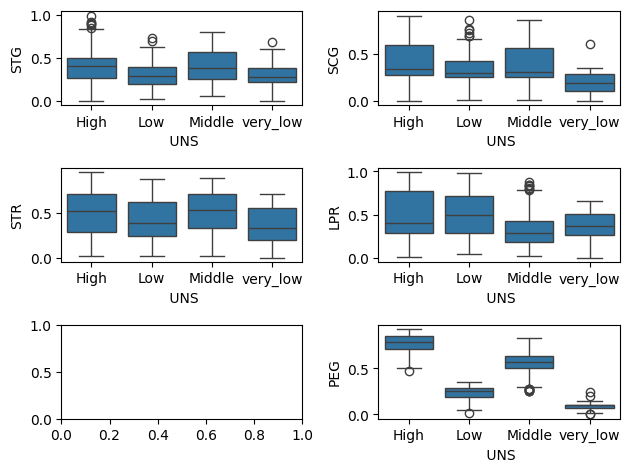

In [ ]:
# диаграмма ящик с усами seaborn
fig, axs = plt.subplots(3, 2)
fn = ["STG", "SCG", "STR", "LPR", 'PEG']
cn = ['High', 'Low', 'Middle', 'very_low']
sns.boxplot(x = ' UNS', y = 'STG', data = data, order = cn, ax = axs[0,0]);
sns.boxplot(x = ' UNS', y = 'SCG', data = data, order = cn, ax = axs[0,1]);
sns.boxplot(x = ' UNS', y = 'STR', data = data, order = cn, ax = axs[1,0]);
sns.boxplot(x = ' UNS', y = 'LPR', data = data,  order = cn, ax = axs[1,1]);
sns.boxplot(x = ' UNS', y = 'PEG', data = data,  order = cn, ax = axs[2,1]);
# add some spacing between subplots
fig.tight_layout(pad=1.0);




<Axes: xlabel=' UNS', ylabel='PEG'>

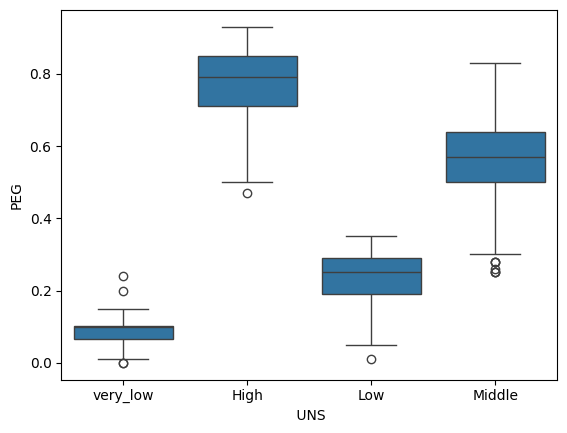

In [ ]:
sns.boxplot(x=' UNS', y='PEG', data=data)

<Axes: xlabel=' UNS', ylabel='STG'>

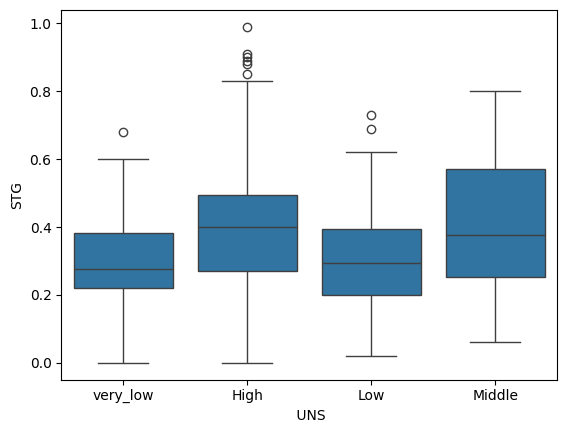

In [ ]:
sns.boxplot(x=' UNS', y='STG', data=data)

<Axes: xlabel=' UNS', ylabel='SCG'>

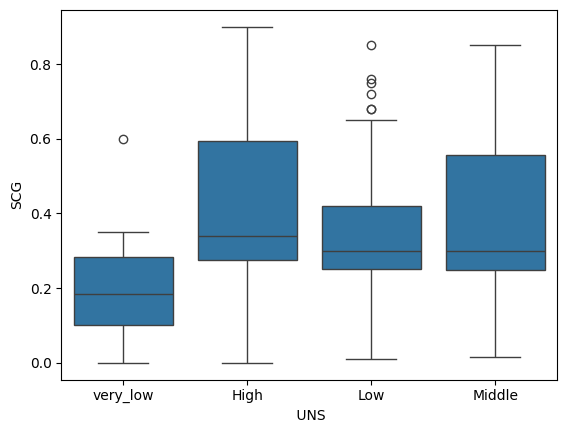

In [ ]:
sns.boxplot(x=' UNS', y='SCG', data=data)

<Axes: xlabel=' UNS', ylabel='STR'>

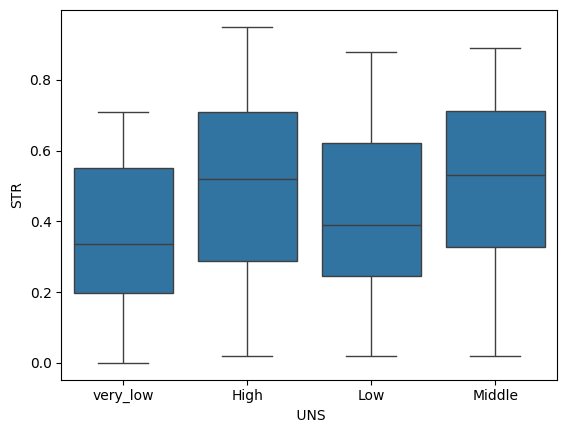

In [ ]:
sns.boxplot(x=' UNS', y='STR', data=data)

<Axes: xlabel=' UNS', ylabel='LPR'>

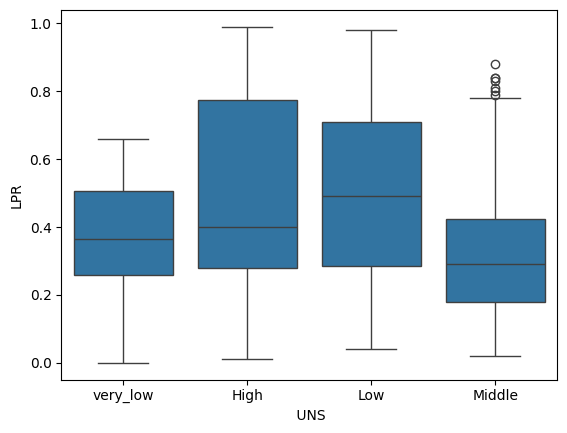

In [ ]:
sns.boxplot(x=' UNS', y='LPR', data=data)

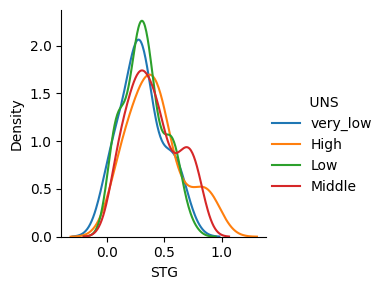

In [ ]:
sns.FacetGrid(data, hue=" UNS") \
   .map(sns.kdeplot, "STG") \
   .add_legend()

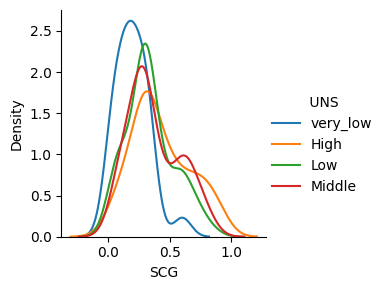

In [ ]:
sns.FacetGrid(data, hue=" UNS") \
   .map(sns.kdeplot, "SCG") \
   .add_legend()

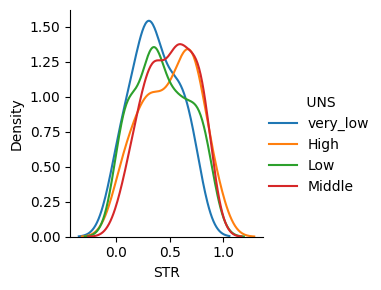

In [ ]:
sns.FacetGrid(data, hue=" UNS") \
   .map(sns.kdeplot, "STR") \
   .add_legend()

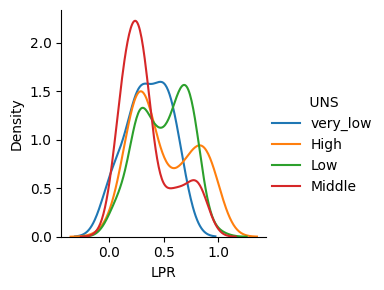

In [ ]:
sns.FacetGrid(data, hue=" UNS") \
   .map(sns.kdeplot, "LPR") \
   .add_legend()

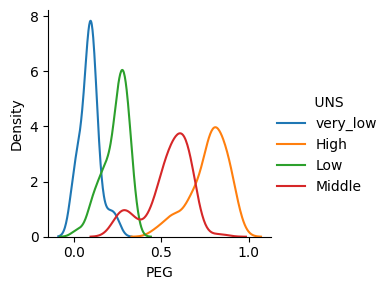

In [ ]:
sns.FacetGrid(data, hue=" UNS") \
   .map(sns.kdeplot, "PEG") \
   .add_legend()

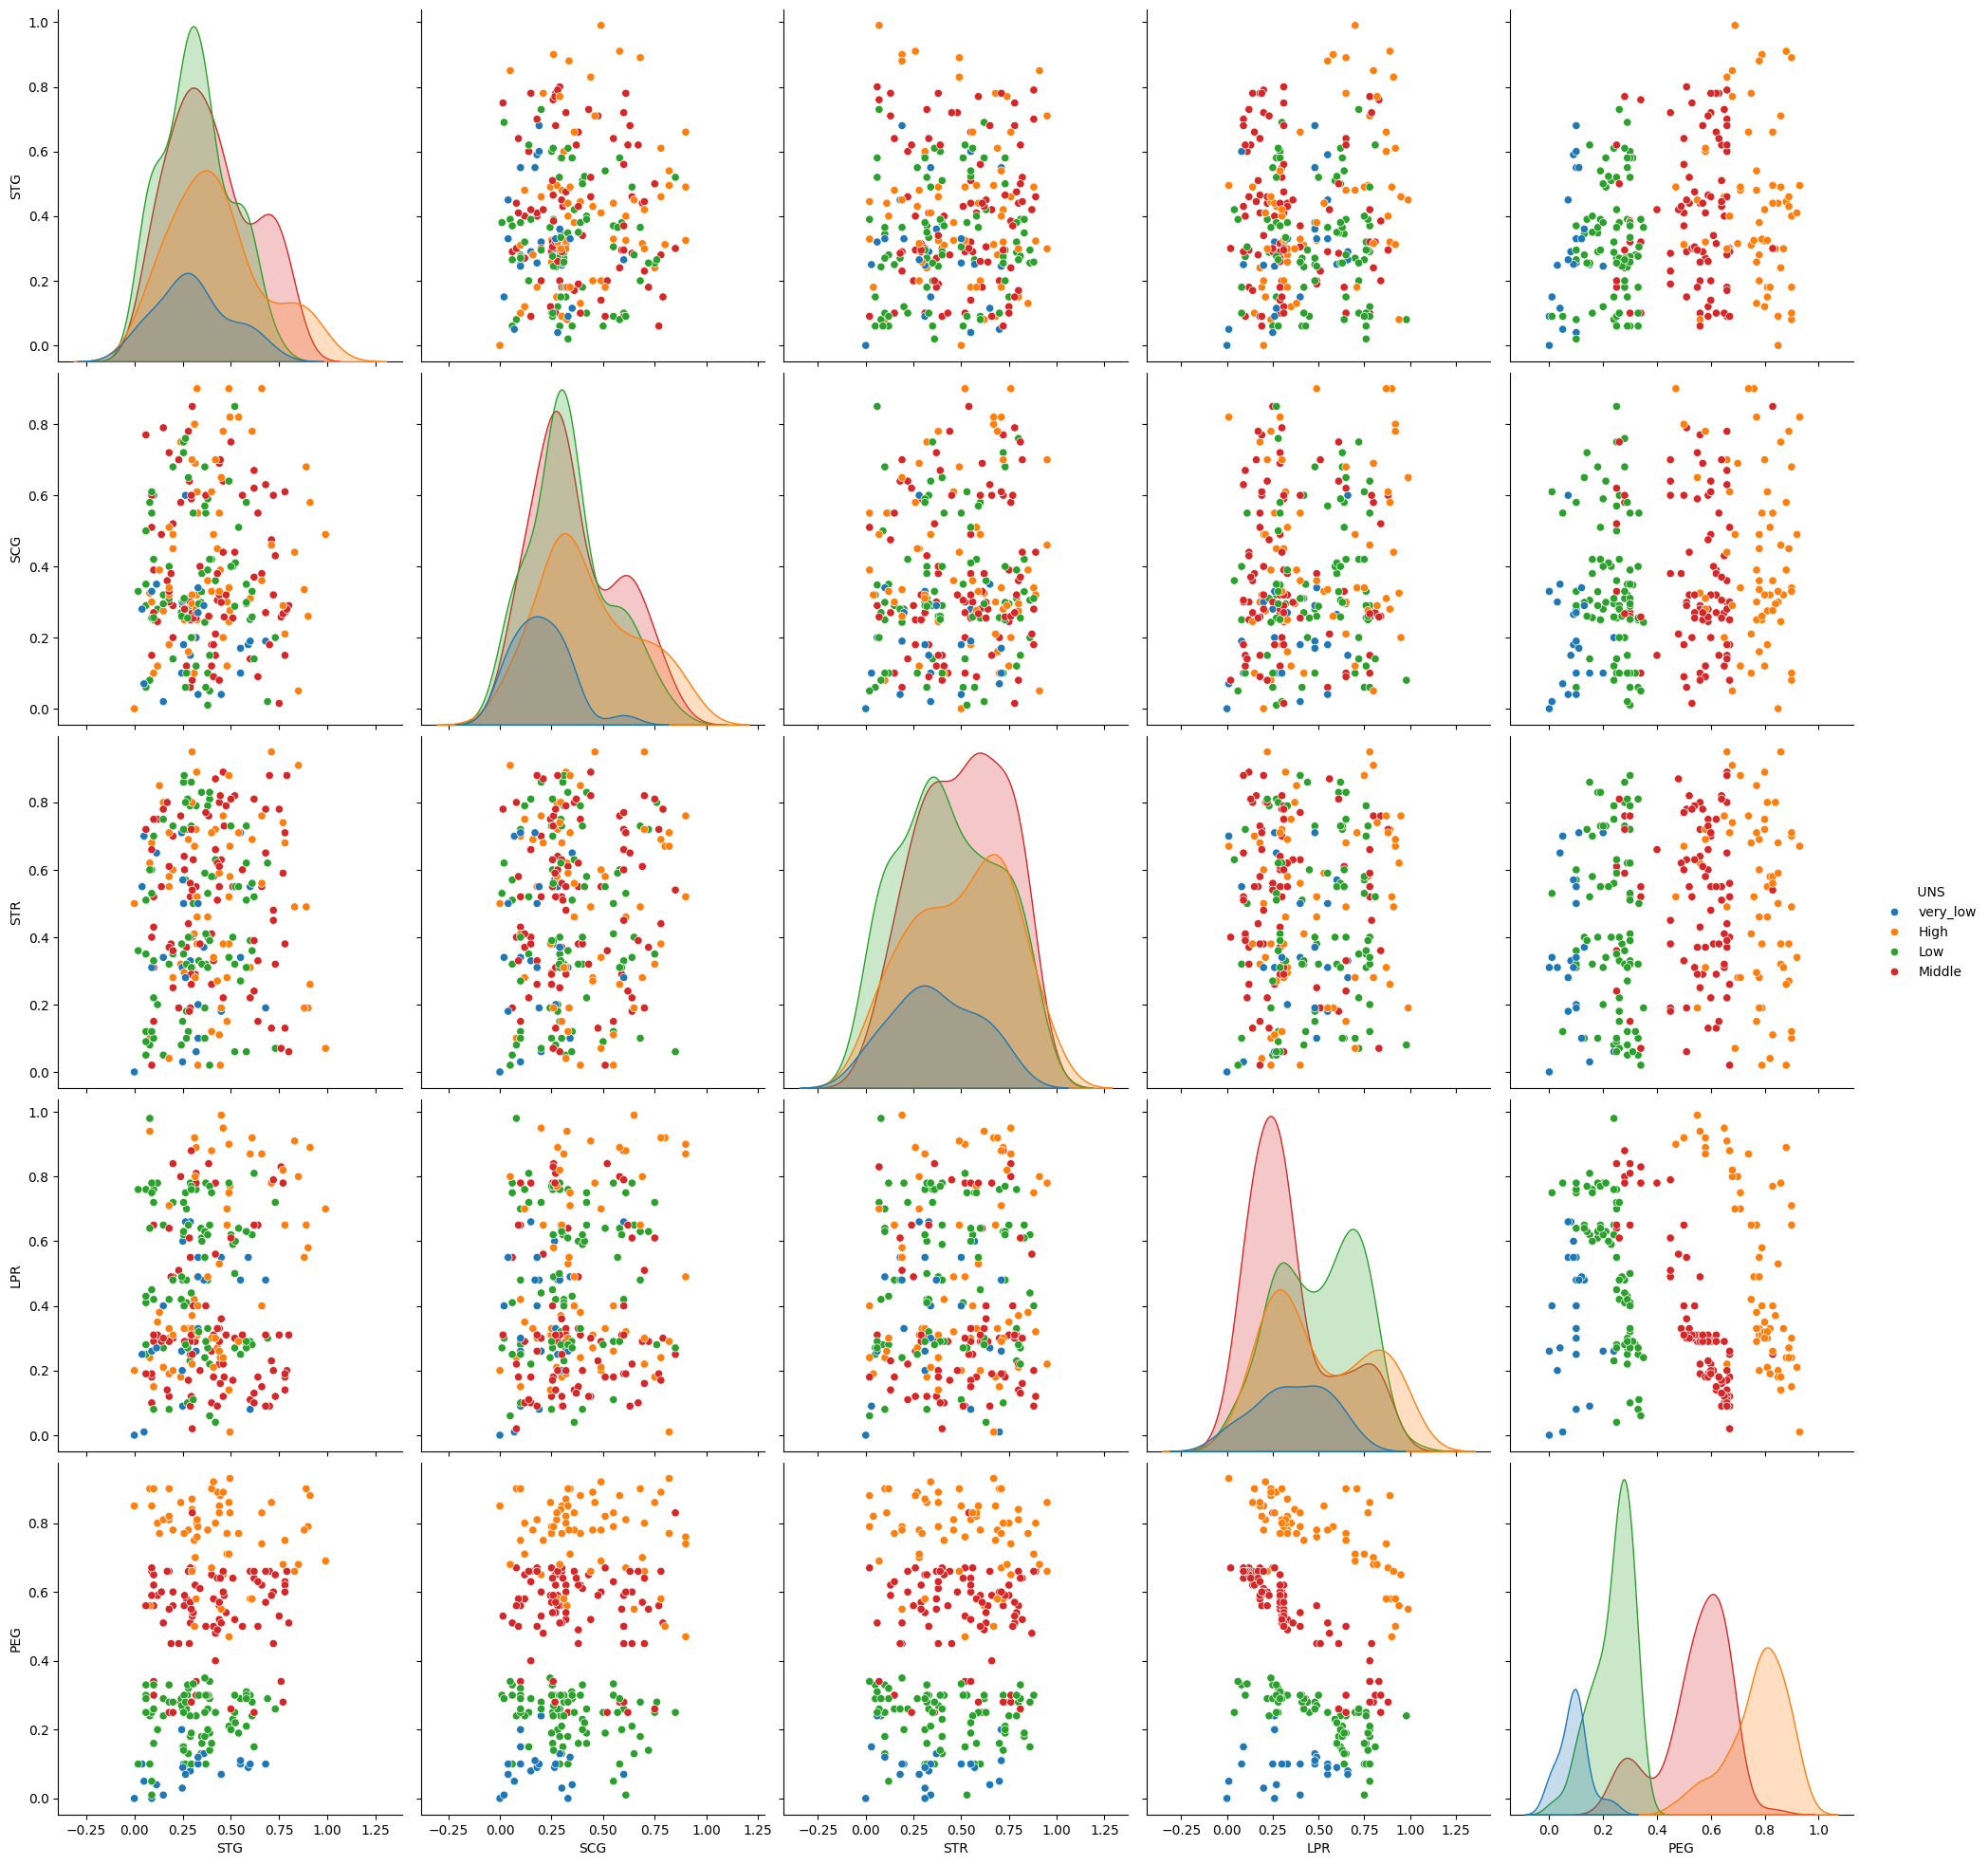

In [ ]:
sns.pairplot(data, hue=' UNS', size=4)

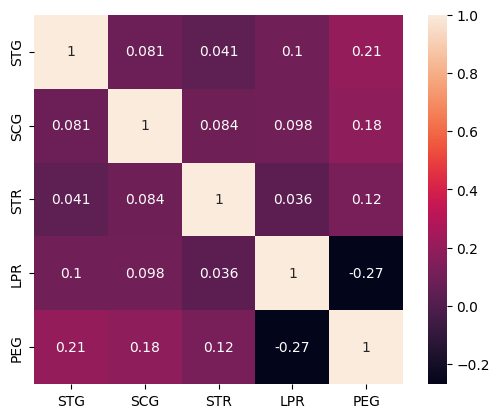

In [ ]:
corrmat = data.corr(numeric_only=True)
sns.heatmap(corrmat, annot = True, square = True);

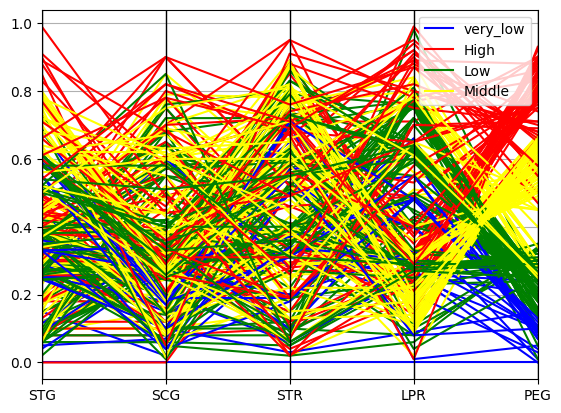

In [ ]:
pd.plotting.parallel_coordinates(data, " UNS", color = ['blue', 'red', 'green', 'yellow']);